# Finding the tension vectors

Tension vectors are tangent to the curve of the edge at the point of intersection with the node. What we want are unit vectors in the direction the edge is making contact at at the node. Let's test this on a simple circle first and then translate it into the arc-edges of the cells. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First we will define several points on a circle centered at (5,10).

[[0.2       0.8236068]
 [0.2       0.3763932]
 [0.4       0.9      ]
 [0.4       0.3      ]
 [0.6       0.8236068]
 [0.6       0.3763932]]


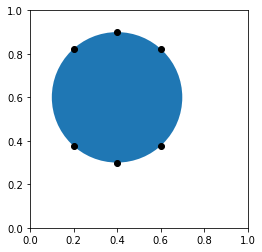

In [2]:
# Define circle params
center = np.array((.4,.6))
radius = .3

# Find points on circle
y_from_x = lambda x, sign: center[1] + sign*np.sqrt(radius**2 - (x-center[0])**2)
pts = np.array([(x, y_from_x(x,s)) for x,s in (
    (.2,1), (.2,-1), 
    (.4,1), (.4,-1), 
    (.6, 1), (.6, -1))])
print(pts)

# Plot circle and points
fig, ax = plt.subplots(1,1)

ax.plot(pts[:,0], pts[:,1], 'ok')
patch = plt.Circle(center, radius)
ax.add_patch(patch)

ax.set(xlim=(0,1), ylim=(0,1), aspect=1);

Ok. So now to find the tangent unit vectors assuming the circle is part of an edge coming into each of those points. 

In [3]:
perp = lambda pt, c: np.array((-(pt[1]-c[1]), pt[0]-c[0]))
perp = lambda pt, c: np.array(((pt[1]-c[1]), -(pt[0]-c[0]))) #either or
perp_unit = lambda pt, c: perp(pt, c)/np.linalg.norm(perp(pt, c)) + pt

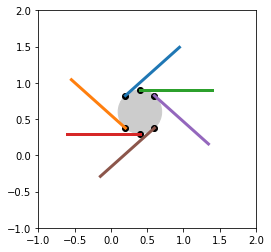

In [4]:
# Plot circle and points
fig, ax = plt.subplots(1,1)

ax.plot(pts[:,0], pts[:,1], 'ok')
patch = plt.Circle(center, radius, color='0.8')
ax.add_patch(patch)

for pt in pts:
    vect = perp_unit(pt, center)
    ax.plot((pt[0], vect[0]), (pt[1], vect[1]), lw=3)

ax.set(xlim=(-1,2), ylim=(-1,2), aspect=1);

Looks like that is correct, let's see if we can do this right in the edges themselves.

We'll create some edges and then plot both them and their unit vectors. 

In [1]:
import sys
sys.path.insert(0, '../cell_soap/')
import cell_describe
node = cell_describe.node
edge = cell_describe.edge

nodes = [node((250, 290)), #n_a, loc0
         node((343, 424)), #n_b, loc1
         node((520, 249)), #n_c, loc2
         node((321, 108)), #n_d, loc3
         node(( 92,  34)), #n_e, loc4
         node(( 42, 246)), #n_f, loc5
         node(( 83, 446))] #n_g, loc6


In [2]:
c = edge(nodes[0], nodes[1], None)
print(nodes[1].tension_vectors)
print(nodes[0].tension_vectors)

[[-0.5701660012087804, -0.8215295071180275]]
[[0.5701660012087804, 0.8215295071180275]]


In [3]:
a = [0.570166,   0.82152951]


In [2]:

# Node xy locations taken from image, radii are 
# pretty random guesses with some intentionally left out
nodes = [node((250, 290)), #n_a, loc0
         node((343, 424)), #n_b, loc1
         node((520, 249)), #n_c, loc2
         node((321, 108)), #n_d, loc3
         node(( 92,  34)), #n_e, loc4
         node(( 42, 246)), #n_f, loc5
         node(( 83, 446))] #n_g, loc6

edges = [edge(nodes[1], nodes[0],  None), #m_ba, loc0
         edge(nodes[2], nodes[1],  500), #m_cb, loc1
         edge(nodes[2], nodes[3],  400), #m_cd, loc2
         edge(nodes[0], nodes[3],  300), #m_ad, loc3
         edge(nodes[5], nodes[0],  900), #m_fa, loc4
         edge(nodes[5], nodes[4],  200), #m_fe, loc5
         edge(nodes[3], nodes[4],  300), #m_de, loc6
         edge(nodes[5], nodes[6], 1000), #m_fg, loc7
         edge(nodes[6], nodes[1], 1000)] #m_gb, loc8

In [7]:
nodes[4].edges

[<cell_describe.edge at 0x10579cb38>, <cell_describe.edge at 0x105798e10>]

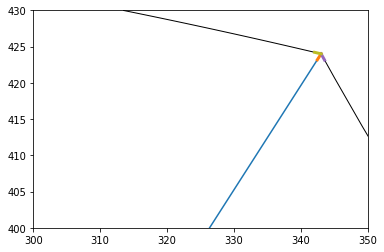

In [4]:
# plot just the edges
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
for an_edge in edges:
    an_edge.plot(ax)
    vectors = an_edge.unit_vectors()
    a, b = an_edge.node_a.loc, an_edge.node_b.loc
    for n,v in zip((a,b), vectors):
        ax.plot([n[0], v[0]+n[0]], [n[1], v[1]+n[1]], lw=3)
ax.set(xlim=[0,540], ylim=[0, 460]);
ax.set(xlim=[248,252], ylim=[285, 295]);
ax.set(xlim=[300,350], ylim=[400, 430]);


Ok, that might be right, but unit vectors have a length of (surprise) 1 so let's zoom in. 

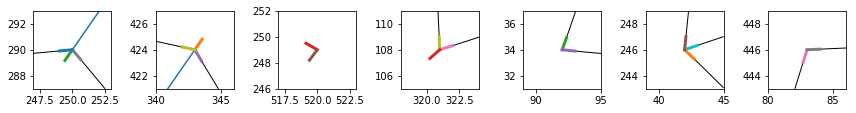

In [47]:
fig, axes = plt.subplots(1,7,figsize=(12,2))
import numpy as np
for ax in axes:
    for an_edge in edges:
        an_edge.plot(ax)
        vectors = an_edge.unit_vectors()
#         print(np.linalg.norm(vectors[:]))
        a, b = an_edge.node_a.loc, an_edge.node_b.loc
        for n,v in zip((a,b), vectors):
            ax.plot([n[0], v[0]+n[0]], [n[1], v[1]+n[1]], lw=3)
            
for ax, an_node in zip(axes, nodes):
    x,y = an_node.loc
    ax.set(xlim=[x-3, x+3], ylim=[y-3,y+3], aspect=1)    
plt.tight_layout()

It looks like we are having some troubles plotting all the edges in the break out (which is working fine in the single plot) but all our unit vectors are happy. I'm going to call this tenatively good. 

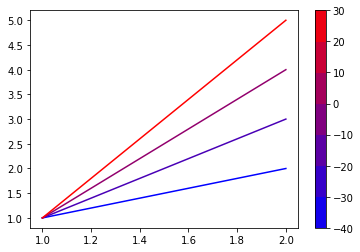

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

min, max = (min(f), max(f))
step = 0.1

# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

# Using contourf to provide my colorbar info, then clearing the figure
Z = [0,0]
levels = range(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()

# Plotting what I actually want
X=
Y=[[1,2],[1,3],[1,4],[1,5]]
Z=[-40,-20,0,30]
for x,y,z in zip(X,Y,Z):
    # setting rgb color based on z normalized to my range
    r = (float(z)-min)/(max-min)
    g = 0
    b = 1-r
    plt.plot(x,y,color=(r,g,b))
plt.colorbar(CS3) # using the colorbar info I got from contourf
plt.show()